# Precificando Opções Asiáticas

Opções asiáticas são um tipo de derivativo financeiro em que o prêmio é definido pela média do preço do ativo subjacente ao longo de um período específico, em vez do seu preço em um único ponto no tempo. Essas opções são comumente utilizadas para reduzir o impacto da volatilidade de curto prazo e são populares em mercados com alta volatilidade. 

Matematicamente, uma Call (opção de compra) com preço de exercício fixo, tem seu payoff expresso a seguir: 

$$ \text{max}\left(\frac{1}{T - t_0}\int_{t_0}^{T}S_t dt - K, 0 \right) $$ 

Seu valor é determinado no vencimento $T$ pela diferença entre média aritmética do preço de um ativo subjacente $S_t$ e preço de exercício $K$.

Utilizando esta fórmula, podemos determinar o valor da opção asiática em qualquer instante de tempo $t$ como: 

$$ C(S, t) = e^{-r(T - t)} \mathbb{E}^{\mathbb{Q}} \left[\text{max} \left(\frac{1}{T - t_0}\int_{t_0}^{T}S_t dt - K, 0 \right) \right] $$

Aqui, $C(S, t)$ representa o valor da opção no instante $t$ com $r$ sendo o retorno do ativo livre de risco, e $\mathbb{E}^{\mathbb{Q}}$ representando a esperança sob uma medida de risco-neutro $\mathbb{Q}$. O que, basicamente, significa o valor presente esperado do payoff da opção. 

Vale notar que o preço da opção asiática é *path-dependent* (sensível ao caminho), significando que seu valor é influenciado por todo o caminho do preço da ação ao longo do período $[t_0, T]$. Como resultado, métodos tradicionais de precificação analítica podem não ser viáveis, e os métodos numéricos tornam-se particularmente vantajosos.


### Medida de Risco-Neutro 

Antes de mais nada, precisamos entender como obtemos essa expressão. Vamos começar adotando as mesmas suposições utilizadas no modelo de Black-Scholes. Neste quadro econômico, existem dois ativos-chave: um ativo livre de risco, representado por $B_t$, que se valoriza a uma taxa de juros constante $r$ ao longo do tempo, de acordo com a fórmula $B_t = B_0 e^{rt}$; e um ativo arriscado, representado por $S_t$. O ativo arriscado apresenta um retorno esperado de $\mathbb{E}\left[\frac{dS_t}{S_t}\right] = \mu dt$ e uma volatilidade de $\mathbb{C}\left[\frac{dS_t}{S_t}\right] = \sigma^2 t$.

A dinâmica do preço do ativo arriscado sob a medida do mundo real, denotada como $\mathbb{P}$, é regida pela seguinte equação diferencial estocástica:

$$ dS_t = \mu S_t dt  + \sigma S_t dW_t^{\mathbb{P}}. $$

Precisamos introduzir o conceito de Movimento Browniano Geométrico sob a medida de risco-neutro, denotada como $\mathbb{Q}$. Para garantir a ausência de oportunidades de arbitragem, aplicamos o teorema fundamental de precificação de ativos, que nos permite identificar uma medida equivalente de martingale. Primeiro, considere o preço descontado do ativo arriscado sob $\mathbb{Q}$, denotado como $e^{r(T - t)}S_t$. A medida $\mathbb{Q}$, equivalente a $\mathbb{P}$, é definida através da derivada de Radon-Nikodym

$$ \frac{d \mathbb{Q}}{d \mathbb{P}} = e^{\frac{1}{2}\lambda^2 t - \lambda W_t} $$

onde $\lambda$ é determinado pela equação

$$ \frac{dS_t}{S_t} = r dt + \sigma(\frac{\mu - r}{\sigma} dt + dW_t^{\mathbb{P}}). $$

De acordo com o teorema de Girsanov, podemos definir um novo processo de movimento Browniano, denotado como $dW_t^{\mathbb{Q}}$, da seguinte forma:

$$ dW_t^{\mathbb{Q}} := \lambda t + dW_t^{\mathbb{P}}, \quad \text{onde} \quad \lambda = \frac{\mu - r}{\sigma} $$

Essa transformação resulta na seguinte dinâmica de risco-neutro para o ativo arriscado:

$$ dS_t = r S_t dt  + \sigma S_t dW_t^{\mathbb{Q}}. $$

Em essência, caracterizamos agora a dinâmica do ativo arriscado sob a medida de risco-neutro $\mathbb{Q}$ em termos de um Movimento Browniano Geométrico.


### Esquema Numérico

Uma abordagem para solucionar a problemática mencionada é por meio de métodos numéricos. Nesse contexto, aplicarei método de Euler-Maruyama para simular a trajetória de um ativo e a técnica de simulação de Monte Carlo para aproximar o valor esperado do payoff. A seguir apresento um esboço do esquema: 

1. Simular o Passeio Aleatório sob a Medida Neutra ao Risco:
 - Comece gerando passeios aleatórios para o preço do ativo subjacente (no nosso caso, $S_t$) sob a medida neutra ao risco ($\mathbb{Q}$). Utilize o modelo de Movimento Browniano Geométrico para simular esses caminhos. 

2. Calcular o Pagamento da Opção para Cada Trajetória:
 - Para cada passeio simulado, calcule o pagamento da opção asiática no momento de exercício $T$. Isso envolve calcular a média dos preços do ativo durante o período de observação $[t_0, T]$ e, em seguida, compará-la ao preço de exercício $K$.

3. Realizar um Grande Número de Simulações para o Mesmo Intervalo de Tempo:
 - A chave para a precisão do método de Monte Carlo é gerar um grande número de simulações para o preço do ativo. Quanto mais simulações forem realizadas, mais próximo você estará de uma estimativa precisa do valor da opção.

4. Calcular a Média dos Pagamentos em Todas as Realizações:
 - Após realizar um grande número de simulações, calcule a média dos pagamentos obtidos em todas as realizações. Essa média representará uma estimativa do valor esperado do pagamento da opção.

5. Desconto para o Valor Presente:
 - Por fim, desconte o valor médio dos pagamentos calculado no passo anterior para trazê-lo ao valor presente. Isso é feito multiplicando o valor médio pelo fator de desconto $e^{-r(T - t)}$, onde $r$ é a taxa de juros livre de risco e $(T - t)$ é o tempo até a expiração do contrato.


### Método de Euler-Maruyama

Para simular os preços de ativos, empregaremos o método de Euler-Maruyama. É essencial destacar que precisamos simular todo caminho, uma vez que o contrato é path-dependent. Consideremos uma Equação Diferencial Estocástica:

$$ dX_t = \mu(t, X(t))dt + \sigma(t, X(t))dW(t), \quad t \in [0, T] \quad X(0) = X_0. $$

Portanto, o Movimento Browniano Geométrico pode ser representado em forma integral da seguinte maneira:

$$ X(t_{j+1}) = X(t_j) + \int_{t_j}^{t_{j+1}} \mu(s, X(s)) dS + \int_{t_j}^{t_{j+1}} \sigma(s, X(s)) dW(s) $$

É importante reconhecer que essa aproximação fundamental é uma extensão do método de Euler aplicado a equações diferenciais ordinárias. A discretização da Equação Diferencial Estocástica usando esse método pode ser expressa da seguinte forma:

$$ X_{j+1} = X(t_j) + \mu(t_j, X_j) \Delta t_j + \sigma(t_j, X_j) \Delta W(t_j) $$

Embora esse método de aproximação possa ser intuitivamente compreendido considerando a primeira integral aproximada por $\mu(t_j, X_j) \Delta t$ e a segunda por $\sigma(t_j, X_j) \Delta W(t_j)$, sua derivação formal é baseada em uma expansão de Taylor.

Agora, procederemos à simulação de uma única trajetória para a aproximação numérica, que é inerentemente uma variável aleatória. Diferentes resultados são obtidos para cada passeio $t \rightarrow W(t)$ do processo de Wiener. Consequentemente, podemos determinar o preço de uma opção asiática usando a fórmula fornecida:

$$ C = e^{-rT} \mathbb{E}^{\mathbb{Q}}\left[\max\left(\frac{1}{T}\int_{0}^{T}S_t dt - K, 0\right)\right] $$

Aqui, a dinâmica de $S_{t+1}$ é dada por:

$$  S_{t+1} = S_t + r S_t \Delta t + \sigma S_t \sqrt{\Delta t} Z, $$

onde $Z$ representa uma variável aleatória Normal padrão para modelar o movimento browniano, e $\Delta t$ é o passo usado para dividir o intervalo $[0, T]$ em $n$ partes iguais. Podemos definir $\Delta t = \frac{T}{n}$ para que $t_j = j \Delta t$ para $j = 0, 1, \ldots, n$.

O esquema para implementar o método de Euler-Maruyama segue como:

**Para** $j$ **de** $1$ **a** $n$ **:**
   - Gerar $Z$ a partir de uma distribuição Normal padrão, $Z \sim \mathcal{N}(0, 1)$.
   - Atualizar $S$ usando a fórmula: $S_{t+1} \gets S_t + r S_t \Delta t + \sigma S_t \sqrt{\Delta t}Z$.

Esse processo iterativo nos permite aproximar os valores de $S$ ao longo de um intervalo de tempo discreto.


### Simulação de Monte Carlo

Monte Carlo (MC) é um algoritmo prontamente implementável utilizado para aproximar expectativas. Sua eficácia baseia-se no princípio conhecido como a Lei Forte dos Grandes Números (SLLN). Vamos explorar a expectativa de uma variável aleatória $X$, denotada como $\mathbb{E}[X]$, expressa como uma integral:

$$ \mathbb{E}[X] = \int x p_X(x) dx $$

Agora, se pudéssemos obter numerosas amostras independentes e identicamente distribuídas (i.i.d.), $x_1, x_2, \ldots, x_N$, da distribuição de probabilidade $p_X$, onde cada $x_i$ adere à distribuição $p_X$. À medida que o número de amostras, denotado como $m$, tende para o infinito, de acordo com a Lei dos Grandes Números:

$$ \frac{1}{m}\sum_{i=1}^{m}x_i \rightarrow \mathbb{E}[X] = \int x p_X(x)dx $$

Essencialmente, observamos:

$$ \frac{1}{m}\sum_{i=1}^{m}x_i \rightarrow \int x p_X(x) \quad \text{(SLLN)} $$

Agora, considere uma integral envolvendo uma função $f(x)$ em relação a $x$:

$$\int f(x) dx = \int \frac{f(x)}{p_X(x)} p_X(x) dx $$

Isso pressupõe que $p_X(x)$ permanece não nulo ao longo do intervalo de integração.

Se possuirmos amostras i.i.d. $x_1, \ldots, x_N$, então, relacionado à SLLN, à medida que o tamanho da amostra $m$ cresce:

$$ \frac{1}{m}\sum_{i=1}^{m} f(x_i) p_X(x_i) \rightarrow \int \frac{f(x)}{p_X(x)} p_X(x) dx = \int f(x) dx. $$

Essencialmente, estamos estimando a integral $\int f(x)dx$ por meio do uso de $\frac{1}{m} \sum_{i=1}^{m}f(x_i)p_X(x_i)$.

Vale ressaltar que a escolha de $p_X(x)$ é inteiramente discricionária, e a precisão da estimativa é notavelmente influenciada pela escolha da distribuição de amostragem. Dentro desse framework, conceitos pertinentes incluem técnicas como amostragem e técnicas de redução de variância.

Para estimar o valor de uma opção asiática usando simulações de Monte Carlo, as seguintes etapas seriam realizadas

- Definir $ \Delta t $ como $ \frac{T}{n} $.
- **Para cada** $ i $ **de** 1 **a** $ m $:
  - Definir $ S $ como $ S_0 $.
  - **Para cada** $ j $ **de** 1 **a** $ n $:
    - Gerar $ Z $ de uma distribuição Normal padrão, $ Z \sim \mathcal{N}(0, 1) $.
    - Atualizar $ S $ usando a fórmula: $ S_{t+1} \gets S_t + r S_t \Delta t + \sigma S_t \sqrt{\Delta t}Z $.
  - Calcular $ \overline{S}_i = \frac{1}{n} \sum_{j=1}^{n} S_{t_j} $.
  - Definir $ C_i $ como $ \max(\overline{S}_i - K, 0) $.
- Calcular $ C = \frac{1}{m} \sum_{i=1}^{m} C_i $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class AsianOptionPricer:
    def __init__(self, S0: float, K: float, T: float, sigma: float, r: float, n: int, m: int):
        """
        Initialize the Asian Option Pricer with provided parameters.

        :param S0: Initial asset price.
        :param K: Strike price of the option.
        :param T: Time to expiration (in years).
        :param sigma: Volatility of the asset.
        :param r: Risk-free interest rate.
        :param n: Number of discrete time steps for simulation.
        :param n_simulations: Number of simulation paths.
        """
        
        self.S0 = S0
        self.K = K
        self.T = T
        self.sigma = sigma
        self.r = r
        self.n = n
        self.m = m

        
    def asian_call_option_payoff(self, S_values):
        """
        Calculate the payoff of an Asian call option based on the average asset price.

        :param S_values: List of asset price paths.
        :return: Payoff of the Asian call option.
        :rtype: float
        """
        asian_average = np.mean(S_values)
        return max(asian_average - self.K, 0)


    def euler_maruyama(self):
        """
        Simulate paths of a financial asset using the Euler-Maruyama method.
        
        :return: A list of simulated paths.
        :rtype: list[list[float]]
        """
        np.random.seed(2023)
        t = self.T / self.n
        S_values = []

        for _ in range(self.m):
            S = [self.S0]

            for j in range(1, self.n + 1):
                Z = np.random.normal(0, 1)
                S_next = S[-1] + self.r * S[-1] * t + self.sigma * S[-1] * np.sqrt(t) * Z
                S.append(S_next)

            S_values.append(S)
        
        return S_values

    
    def price_asian_call_option(self):
        """
        Calculate the price of an Asian call option using Monte Carlo simulation.

        :return: Estimated Asian call option price.
        :rtype: float
        """
            
        S_values = self.euler_maruyama()

        asian_call_payoffs = [self.asian_call_option_payoff(S) for S in S_values]
        asian_call_option_price = np.exp(-self.r * self.T) * np.mean(asian_call_payoffs)

        return asian_call_option_price
    
    
    def plot_asset_paths(self):
        """
        Plot the simulated asset price paths over time.

        This function generates a plot of the simulated asset price paths over time.
        """
        
        S_values = self.euler_maruyama()

        plt.figure(figsize=(10, 6))
        for path in S_values:
            plt.plot(np.arange(0, self.T + 0.001, self.T / self.n), path)
        plt.xlabel('Time')
        plt.ylabel('Asset Price')
        plt.title('Asian Option Simulation Paths')
        plt.grid(True)
        plt.show()

Asian Call Option Price: 5.78


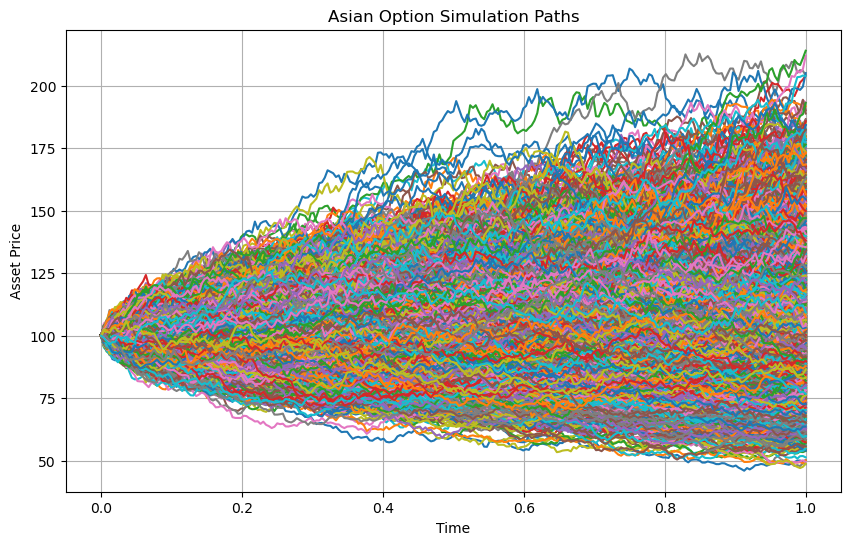

In [2]:
# Example usage:
S0 = 100
K = 100
T = 1.0
sigma = 0.20
r = 0.05
n = 252
m = 10000

asian_option_pricer = AsianOptionPricer(S0, K, T, sigma, r, n, m)
asian_call_option_price = asian_option_pricer.price_asian_call_option()

print(f"Asian Call Option Price: {asian_call_option_price:.2f}")

# Plot asset price paths
asian_option_pricer.plot_asset_paths()


### Abordagem com Equações Diferenciais Parciais

Por mera curiosidade, vou explorar a abordagem usando Equações Diferenciais Parciais (EDPs) para precificar uma opção asiática. Vamos iniciar com o mesmo conjunto de considerações.

Considere uma opção asiática com um preço de exercício fixo, escrita sobre uma ação com preço $S_t$ no tempo $t$, que pode ser exercida no tempo $T$ com um preço de exercício de $K$, determinado pela média aritmética ao longo do período $[t_0, T]$. Nesse cenário, podemos definir precisamente o payoff para uma opção asiática com preço de exercício fixo da seguinte forma:

$$ \text{max} \left( \frac{1}{T - t_0}\int_{t_0}^{T}S_t dt - K, 0 \right) $$

Utilizando a equação fornecida,

$$ C(S, t) = e^{-r(T - t)} \mathbb{E}^{\mathbb{Q}} \left[ \text{max} \left( \frac{1}{T - t_0}\int_{t_0}^{T}S_t dt - K, 0 \right) \right] $$

A precificação da opção de compra é dependente do caminho, o que significa que não podemos contar com a propriedade de Markov, já que $C(S, t)$ depende do caminho completo de $S_t$. Além disso, é crucial introduzir um segundo processo para representar o estado aumentado de $S_t$ denominado como:

$$ I(t) = \int_0^t S_u du $$

Consequentemente, a Equação Diferencial Estocástica que governa $I(t)$ é dada por:

$$ dI(t) = S_t dt. $$

Isso implica na existência da função:

$$ C(S, I, t) = e^{-r(T-t)} \mathbb{E}^{\mathbb{Q}} \left[ \max{ \left( \frac{1}{T}I(t) - K, 0 \right) } \right]$$

O processo do valor presente da opção asiática conforma-se a um Martingale dentro da medida de risco-neutro. A partir da equação acima, podemos derivar a EDP. Nesse cenário, $dS(t) = r S(t) dt + \sigma S(t) dW^{\mathbb{Q}}(t)$ e $dS \times dS = \sigma^2 S^2 dt$. Notavelmente, uma vez que $dI \times dI = 0$, segue-se que $dS \times dI = 0$. Ao examinar a variação de $C(S, I, t)$, podemos obter a seguinte expressão:

$$ \frac{\partial C}{\partial t} + \frac{1}{2} \sigma^2 S^2\frac{\partial^2 C}{\partial S^2} + S \frac{\partial C}{\partial I} + rS \frac{\partial C}{\partial S} - rC = 0 $$

A equação acima pode ser simplificada para uma EDP de um estado, o que simplifica o processo, pois o preço da opção é homogêneo em $S_t$ e $\frac{1}{T}\int_0^t S_u du - K$. O processo toma a seguinte forma para $T=t$:

$$ \phi_t = \frac{\int_0^t S_u du - K}{S_t} $$

Ao aplicar o Lema de Itô para encontrar a equação diferencial estocástica que governa a dinâmica sob $\mathbb{Q}$, podemos derivar:

$$ d\phi_t = \frac{1}{S_t}d\left(\frac{1}{T} \int_0^t S_u du - K\right) + \left(\frac{1}{T} \int_0^t S_u du - K\right)d\left(\frac{1}{S_t}\right) + d\left(\frac{1}{T} \int_0^t S_u du - K\right)d\left(\frac{1}{T}\right) $$

$$ d\phi_t = \frac{1}{S_t} \frac{1}{T} S_t dt + \left(\frac{1}{T} \int_0^t S_u du - K\right) d\left(\frac{1}{S_t}\right) + \left(\frac{1}{T} S_t dt\right) d\left(\frac{1}{S_t}\right) $$

Aplicando o Lema de Itô ao termo $d\left(\frac{1}{S_t}\right)$, obtemos:

\begin{align*}
d\left(\frac{1}{S_t}\right) &= - \frac{1}{S_t^2}dS_t + \frac{1}{2} \frac{2}{S_t^3} (dS_t)^2 \\
&= - \frac{1}{S_t^2}(rS_t dt + \sigma S_t dW_t^{\mathbb{Q}}) - \frac{1}{S_t^3}\sigma^2 S_t^2 dt \\
&= - \frac{1}{S_t} \left((\sigma^2 - r)dt - \sigma dW_t^{\mathbb{Q}}\right)
\end{align*}

Dado que $dt \times dt = 0$, $dt \times dW_t^{\mathbb{Q}} = 0$, e $dW_t^{\mathbb{Q}} \times dW_t^{\mathbb{Q}} = 0$, temos:

\begin{align*}
d\phi_t &= \frac{1}{T}dt + \left(\frac{1}{T} \int_0^t S_u du - K\right)\left(\frac{1}{S_t}(\sigma^2 - r)dt + \sigma dW_t^{\mathbb{Q}}\right) \\
&= \left(\frac{1}{T} - r \phi_t\right)dt - \sigma \phi_t \left(dW_t^{\mathbb{Q}} - \sigma dt\right)
\end{align*}

A derivada de Radon-Nikodym é definida como $\frac{d \mathbb{Q*}}{d \mathbb{Q}} = \frac{e^{-rT} S_t}{S_0}$ e assim obtemos:

$$ \mathbb{Q*}(A) = \int_A e^{-\frac{\sigma^2}{2}T + \sigma dW^{\mathbb{Q}}} d \mathbb{Q} $$

O Teorema de Girsanov assegura que sob $\mathbb{Q*}$, $W_t^{\mathbb{Q*}} = W_t^{\mathbb{Q}} - \sigma t$ é um movimento Browniano. Portanto, a equação torna-se:

$$ d\phi_t = \left( \frac{1}{T} - r\phi_t \right) dt - \sigma \phi_t dW_t^{\mathbb{Q*}}. $$

A solução para a EDP

$$ \frac{\partial C}{\partial t} + \left( \frac{1}{T} - r\phi_t \right) \frac{\partial C}{\partial \phi_t} + \frac{1}{2}\sigma^2 \phi_t^2 \frac{\partial^2 C}{\partial \phi_t^2} = 0, $$

segue do Teorema de Feynman-Kac, o que implica:

\begin{align*}
C &= \mathbb{E^{\mathbb{Q*}}}[\max(\phi_t, 0)]
\end{align*}


### Referências

1. **JAHNKE, T.**. *Numerical Methods in Mathematical Finance*. Karlsruher Institut fur Technologie (KIT), Chapter 5.

2. **MUDZIMBEBWE, W.**. *Pricing Methods for Asian Options*. Department of Mathematics and Applied Mathematics, University of the Western Cape, Chapter 5.

3. **KLOEDEN, P. E., & PLATEN, E.**. *Numerical Solution of Stochastic Differential Equations*. Springer, Chapters 9 & 10.

4. **SHREVE, S. E.**. *Stochastic Calculus for Finance II: Continuous-Time Models*. Springer, Chapter 7.

5. **WILLMOT, P.**. *Quantitative Finance*, Chapter 24 & 80. John Sons and Willey.